In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('Mall_Customers.csv')
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = X.drop(columns =['CustomerID','Genre','Age'])
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [5]:
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
X = X.to_numpy()
X[:5,:]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

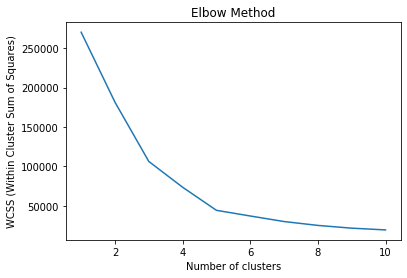

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [8]:
km = KMeans(n_clusters=5,random_state=42)
km.fit(X)
y = km.predict(X)
centers = km.cluster_centers_


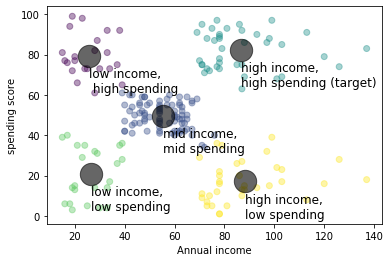

In [9]:
segments = ['low income,\n high spending','mid income, \nmid spending','high income, \nhigh spending (target)','low income, \nlow spending','high income, \nlow spending']
plt.scatter(X[:, 0], X[:, 1], c=y,alpha = 0.4)
plt.scatter(centers[:, 0], centers[:, 1], c='0', s=500, alpha=0.6);
plt.xlabel('Annual income')
plt.ylabel('spending score')
for i in range(5):
    plt.annotate(segments[i], xy=(centers[i,0],centers[i,1]), xytext=(centers[i,0],centers[i,1]-18.0),c = '0',size=12)
plt.show()